In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('sp500_top10_stocks_clean.csv')

In [15]:
print(df.head(10))

         Date Ticker       Open       High        Low      Close  Adj_Close  \
0  2010-01-04   AAPL   6.395005   6.427065   6.363544   6.412384   6.412384   
1  2010-01-04   AMZN   6.812500   6.830500   6.657000   6.695000   6.695000   
2  2010-01-04   AVGO   1.289115   1.331381   1.268686   1.328563   1.328563   
3  2010-01-04   GOOG  15.498976  15.562262  15.431981  15.494032  15.494032   
4  2010-01-04  GOOGL  15.571782  15.635366  15.504474  15.566814  15.566814   
5  2010-01-04   MSFT  22.883435  23.242157  22.861015  23.130056  23.130056   
6  2010-01-04   NVDA   0.424265   0.426787   0.415097   0.423807   0.423807   
7  2010-01-05   AAPL   6.430062   6.459725   6.389611   6.423470   6.423470   
8  2010-01-05   AMZN   6.671500   6.774000   6.590500   6.734500   6.734500   
9  2010-01-05   AVGO   1.334902   1.355331   1.275025   1.338425   1.338425   

        Volume  
0  493729600.0  
1  151998000.0  
2    5387000.0  
3   78541293.0  
4   78169752.0  
5   38409100.0  
6  80020400

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35765 entries, 0 to 35764
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       35765 non-null  object 
 1   Ticker     35765 non-null  object 
 2   Open       35765 non-null  float64
 3   High       35765 non-null  float64
 4   Low        35765 non-null  float64
 5   Close      35765 non-null  float64
 6   Adj_Close  35765 non-null  float64
 7   Volume     35765 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.2+ MB


In [17]:
df.isnull().sum()

,0
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Adj_Close,0
Volume,0


In [18]:
df['Date'] = pd.to_datetime(df['Date'])


if df.isnull().values.any():
    print(f"Borrando {df.isnull().sum().sum()} valores nulos...")
    df.dropna(inplace=True)


df = df[df['Date'] > '2021-01-01']

print("¡Dataset limpio y listo!")
print(df.dtypes)

¡Dataset limpio y listo!
Date         datetime64[ns]
Ticker               object
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume              float64
dtype: object


In [19]:
# 1. Aseguramos que la fecha sea de tipo datetime y ordenamos
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])

# 2. Calculamos el Retorno Diario
# 'pct_change' calcula la diferencia porcentual entre una fila y la anterior
df['Daily_Return'] = df.groupby('Ticker')['Adj_Close'].pct_change()

# 3. Limpieza post-cálculo
# La primera fila de cada empresa quedará como NaN (porque no tiene día anterior).
# Podemos llenarla con 0 para evitar errores en el dashboard.
df['Daily_Return'] = df['Daily_Return'].fillna(0)

# Verificamos
print(df[['Date', 'Ticker', 'Adj_Close', 'Daily_Return']].head())

            Date Ticker   Adj_Close  Daily_Return
24200 2021-01-04   AAPL  125.856697      0.000000
24209 2021-01-05   AAPL  127.412758      0.012364
24218 2021-01-06   AAPL  123.123848     -0.033662
24227 2021-01-07   AAPL  127.325256      0.034123
24236 2021-01-08   AAPL  128.424210      0.008631


In [20]:
# Calcular la Volatilidad Móvil de 20 días (un mes de trading)
# Usamos 'rolling' para que sea una ventana que se mueve día con día
df['Volatility_20d'] = df.groupby('Ticker')['Daily_Return'].transform(lambda x: x.rolling(window=20).std())

# Tip profesional: Las primeras 19 filas de cada empresa serán NaN
# porque necesitan 20 días de historial para calcular su primera desviación.

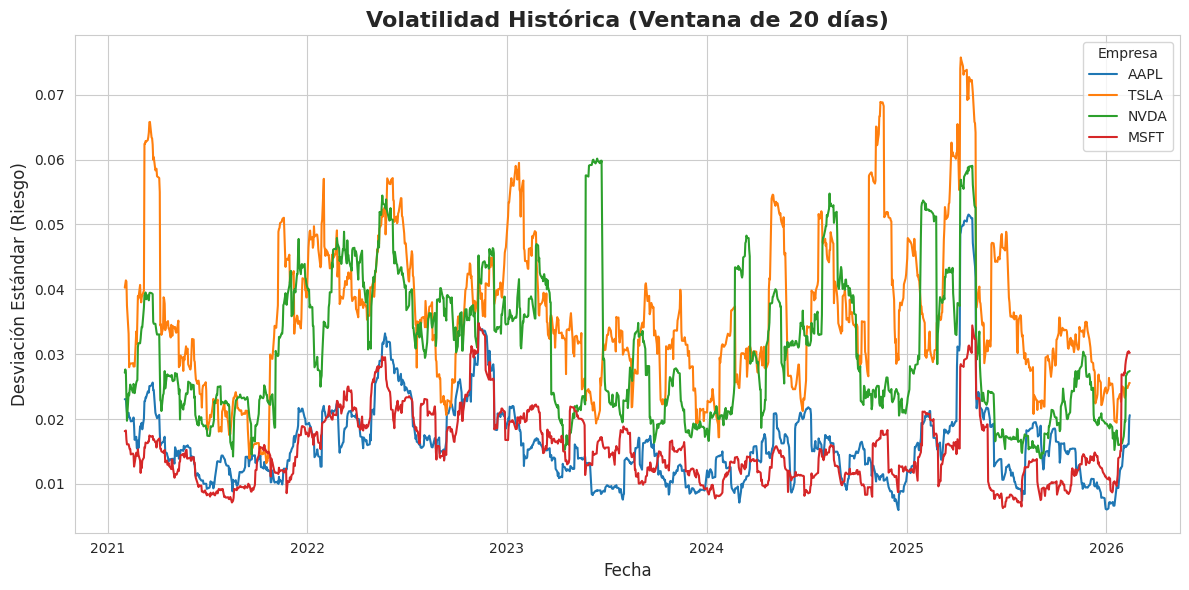

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Elegimos qué tickers mostrar para no saturar la gráfica
tickers_interes = ['AAPL', 'TSLA', 'NVDA', 'MSFT']

for ticker in tickers_interes:
    # Filtramos los datos por empresa
    datos_ticker = df[df['Ticker'] == ticker]
    plt.plot(datos_ticker['Date'], datos_ticker['Volatility_20d'], label=ticker, linewidth=1.5)

# Personalización
plt.title('Volatilidad Histórica (Ventana de 20 días)', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Desviación Estándar (Riesgo)', fontsize=12)
plt.legend(title="Empresa")
plt.tight_layout()

plt.show() # O plt.savefig('volatilidad.png')

In [22]:
import plotly.express as px

# Creamos la gráfica interactiva
fig = px.line(df,
              x='Date',
              y='Volatility_20d',
              color='Ticker',
              title='Análisis de Volatilidad: Top 10 S&P 500',
              labels={'Volatility_20d': 'Nivel de Riesgo', 'Date': 'Año'})

# Mejoramos el diseño
fig.update_layout(template='plotly_dark', hovermode='x unified')
fig.show()

In [23]:
from google.colab import files
df.to_csv('sp500_para_powerbi.csv', index=False)
files.download('sp500_para_powerbi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>